In [111]:
# import
from sklearn import datasets as ds
from sklearn import model_selection as ms
from sklearn import ensemble as en
from sklearn import metrics as mt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [112]:
X, y = ds.make_classification(n_samples=1000, n_classes=2, random_state=0, n_features=7, n_redundant=3)
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2)

In [113]:
#definition
model = en.RandomForestClassifier(n_estimators=4, max_depth=2, random_state=0, n_jobs=-1)

#fit
model.fit(X_train, y_train)

#performance
pred_test = model.predict_proba(X_test)




In [114]:
pred_test = pred_test[:, 1]
pred_test

array([0.59445421, 0.35734768, 0.35734768, 0.35734768, 0.35734768,
       0.29011552, 0.59445421, 0.35734768, 0.6269692 , 0.59445421,
       0.35734768, 0.59445421, 0.35734768, 0.72454825, 0.59445421,
       0.35734768, 0.35734768, 0.35734768, 0.59445421, 0.35734768,
       0.46150381, 0.35734768, 0.85898588, 0.38986267, 0.35734768,
       0.59445421, 0.85898588, 0.35734768, 0.35734768, 0.59445421,
       0.35734768, 0.38986267, 0.35734768, 0.35734768, 0.35734768,
       0.35734768, 0.48744172, 0.68835343, 0.59445421, 0.59445421,
       0.35734768, 0.35734768, 0.6269692 , 0.38986267, 0.46150381,
       0.35734768, 0.35734768, 0.85898588, 0.59445421, 0.35734768,
       0.59445421, 0.35734768, 0.46150381, 0.35734768, 0.59445421,
       0.35734768, 0.35734768, 0.6269692 , 0.85898588, 0.63717949,
       0.35734768, 0.35734768, 0.35734768, 0.35734768, 0.59445421,
       0.59445421, 0.59445421, 0.59445421, 0.6269692 , 0.59445421,
       0.72454825, 0.35734768, 0.39502973, 0.35734768, 0.35734

In [115]:
# ROC Curve
fpr, tpr, th = mt.roc_curve(y_test, pred_test)

Text(0, 0.5, 'tpr')

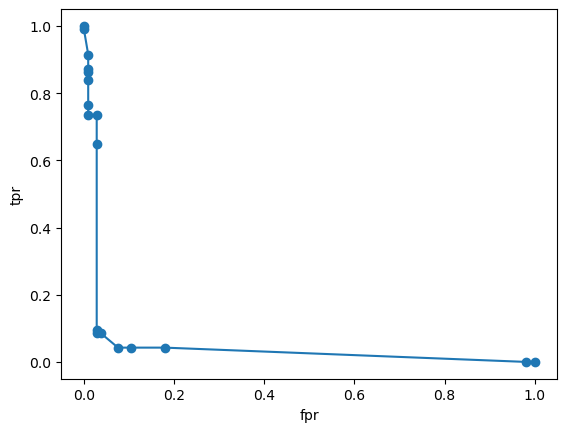

In [116]:
plt.plot(fpr, 1-tpr, marker='o')

plt.xlabel('fpr')
plt.ylabel('tpr')

In [117]:
distance = np.sqrt(1-tpr**2 + fpr **2)
distance

array([1.        , 0.99994341, 0.99641653, 0.99186291, 0.99043561,
       0.98723097, 0.97227212, 0.96403093, 0.96440014, 0.93677915,
       0.4279291 , 0.40468589, 0.40545489, 0.29831458, 0.30669947,
       0.33974178, 0.98113208, 1.        ])

In [118]:
np.argmin(distance)

13

In [119]:
th[10]

0.5944542073636014

In [120]:
best_th = th[np.argmin(distance)]
print('Best threshold = {} '.format(best_th))

Best threshold = 0.4615038115038116 


In [121]:
pred_test = (pred_test >= best_th).astype(int)

In [122]:
acc = mt.accuracy_score(pred_test, y_test)
print('Accuracy: {} '.format(acc))

Accuracy: 0.94 


In [123]:
feature_names = [f'Feature {i}' for i in range(X.shape[1])]
importances = model.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
forest_importances

Feature 0    0.000000
Feature 1    0.022721
Feature 2    0.061260
Feature 3    0.354245
Feature 4    0.037451
Feature 5    0.181679
Feature 6    0.342643
dtype: float64

Text(0, 0.5, 'Mean decrease in impurity')

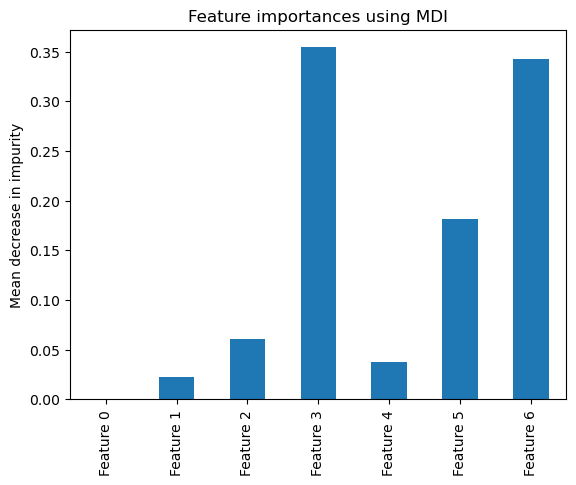

In [126]:
forest_importances.plot.bar()
plt.title('Feature importances using MDI')
plt.ylabel('Mean decrease in impurity')